In [1]:
import numpy as np
import h5py 
import matplotlib.pyplot as plt
plt.style.use('Notebook.mystyle')
import spectra_mocking as sm
from scipy.ndimage import gaussian_filter as gf
import importlib
import glob
import matplotlib
#%matplotlib widget

In [3]:
def get_prog_contours(prog_num, value, sigma=4):
    from skimage import measure
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection
    DM = h5py.File('./progenitors/map_PC_prog'+str(prog_num)+'.hdf5','r')['DM'][:]
    num_parts = h5py.File('./progenitors/map_PC_prog'+str(prog_num)+'.hdf5','r')['num_parts'][()]
    DM_field = h5py.File('TNG_DensField/TNG_DM_z2.4.hdf5','r')['DM/dens'][:]
    ind = np.where(DM!=0)
    alpha = np.log10(np.sum(np.ravel(gf(DM,sigma,mode='wrap')[ind])) / np.sum(np.ravel(gf(DM_field, sigma, mode='wrap')[ind])))
    print(alpha)
    beta = (num_parts*48)/(2500**3)
    print(np.log10(beta))
    print('average signal within prog : ', alpha+np.log10(beta))
    #print(num_parts*48)
    DM *=  beta
    
    DM = gf(DM, sigma, mode='wrap')
    ind = np.where(DM == 0)
    DM[ind] = 1e-10
    DM = np.log10(DM)

    
    
    return measure.marching_cubes(DM, value)
    
    
def plot_prog_3D(fig, ax, prog_num=0):
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection
    lmap = h5py.File('./thresh/labeled_map_TNG_z2.4_n1_sigma4_th2.35.hdf5','r')['map'][:]
    for i, value in enumerate(np.arange(-1.5,-1.0, 0.2)):
        
        verts, faces, normals, values = get_prog_contours(prog_num, value=value)
        #print(verts.size)
        mesh = Poly3DCollection(verts[faces], alpha=0.5*i/6)
        mesh.set_edgecolor('None')
        ax.add_collection3d(mesh)
        
    from skimage import measure
    lmap_prog = np.zeros_like(lmap)
    lmap_prog[np.where((lmap==prog_num+1))] = 1
    verts, faces, normals, values = measure.marching_cubes(lmap, 0.99)
    mesh = Poly3DCollection(verts[faces], alpha=0.2, color='C1')
    mesh.set_edgecolor('None')
    ax.add_collection3d(mesh)
    ax.set_xlim((10,100))
    ax.set_ylim((20,120))
    ax.set_zlim((90,150))



fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
for prog_num in [0]:
    plot_prog_3D(fig, ax, prog_num)
ax.view_init(-30,60)
    
    

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

2.8309838324138275
[-4.25651081]
average signal within prog :  [-1.42552697]
2.8309838324138275
[-4.25651081]
average signal within prog :  [-1.42552697]
2.8309838324138275
[-4.25651081]
average signal within prog :  [-1.42552697]


In [2]:
def get_prog_contours(value, sigma=4):
    from skimage import measure
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection
    DM_prog_all = h5py.File('./progenitors/Full_prog_map.hdf5','r')['DM'][:]
    DM_prog_all = gf(DM_prog_all, sigma, mode='wrap')
    ind = np.where(DM_prog_all == 0)
    DM_prog_all[ind] = 1e-10
    DM_prog_all = np.log10(DM_prog_all)

    
    
    return measure.marching_cubes(DM_prog_all, value)
    
    
def plot_prog_3D(fig, ax, prog_num=0):
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection
    lmap = h5py.File('./thresh/labeled_map_TNG_z2.4_n1_sigma4_th2.35.hdf5','r')['map'][:]
    for i, value in enumerate(np.arange(-1.5,-1.0, 0.2)):
        verts, faces, normals, values = get_prog_contours(value=value)
        #print(verts.size)
        mesh = Poly3DCollection(verts[faces], alpha=0.5*i/6)
        mesh.set_edgecolor('None')
        ax.add_collection3d(mesh)
        
    from skimage import measure
    verts, faces, normals, values = measure.marching_cubes(lmap, 0.99)
    mesh = Poly3DCollection(verts[faces], alpha=0.15, color='C1')
    mesh.set_edgecolor('None')
    ax.add_collection3d(mesh)
    ax.set_xlim((0,205))
    ax.set_ylim((0,205))
    ax.set_zlim((0,205))


fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
plot_prog_3D(fig, ax, prog_num)
    

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

NameError: name 'prog_num' is not defined

In [16]:
for phi in range(0,360,50):
    ax.view_init(30,phi)
    fig.savefig('3D_figures/3D_test_phi'+str(phi)+'.png')

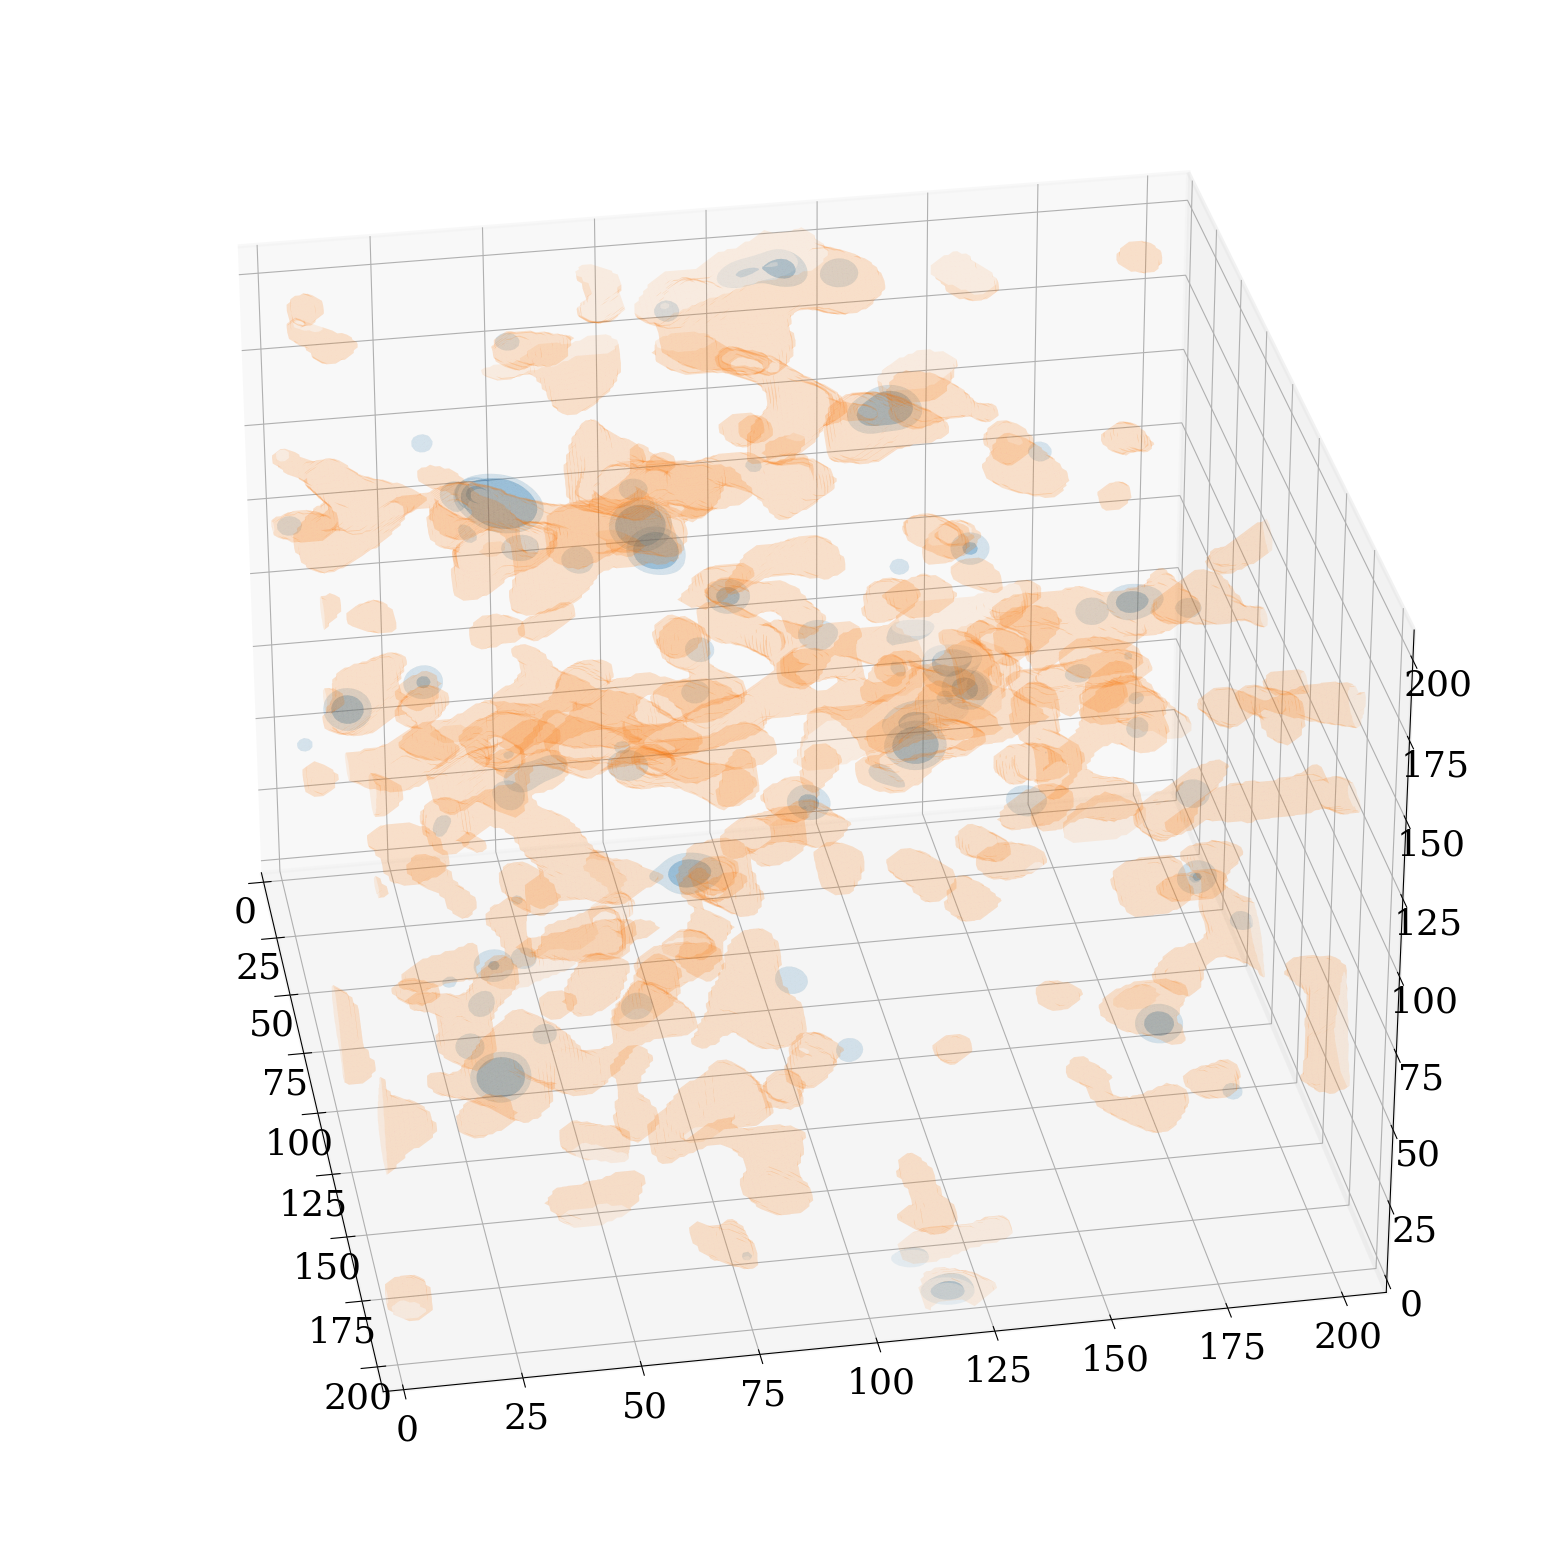

In [18]:
ax.set_xlim((0,205))
ax.set_ylim((0,205))
ax.set_zlim((0,205))
fig

'/run/media/mahdi/HD2/Lya/3DModels/LATIS-3D-Models'

In [3]:
phi, theta = np.meshgrid(np.arange(5,361,5), np.arange(-70,71,20))

In [4]:
print(np.ravel(theta).size)
print(np.ravel(phi))

576
[  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175 180
 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265 270
 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355 360
   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175 180
 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265 270
 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355 360
   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175 180
 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265 270
 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355 360
   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100 105 110 115 120 125 130 135 140 145 15

## Save the STL Model :

In [2]:
import numpy as np
import h5py 

Hot to get progenitors

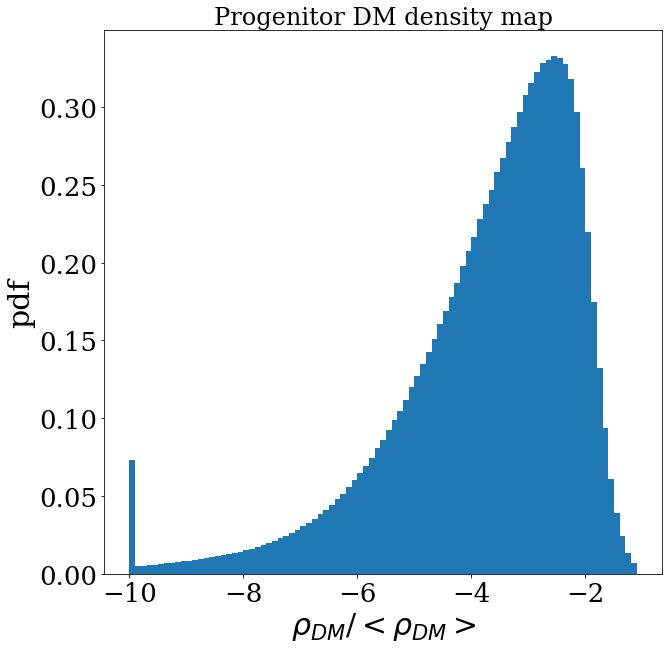

In [9]:
def best_level_prog():
    plt.style.use('Notebook.mystyle')
    DM_prog_all = h5py.File('./progenitors/Full_prog_map.hdf5','r')['DM'][:]
    DM_prog_all = gf(DM_prog_all, sigma=4, mode='wrap')
    ind = np.where(DM_prog_all == 0)
    DM_prog_all[ind] = 1e-10
    DM_prog_all = np.log10(DM_prog_all)
    plt.hist(np.ravel(DM_prog_all), bins=np.arange(-10,-1, 0.1), density=True)
    plt.title('Progenitor DM density map')
    plt.xlabel(r'$\rho_{DM} / <\rho_{DM}>$')
    plt.ylabel('pdf')
    
best_level_prog()

How about -2.5 ?

In [10]:
def save_prog_stl():
    from skimage import measure
    from stl import mesh
    
    def _plot_progs(value, sigma=4):
        """A helper function to plot all progenitors
        value : is the isocontour density value we want to plot. Plotting is like onion layers.
        """
        DM_prog_all = h5py.File('./progenitors/Full_prog_map.hdf5','r')['DM'][:]
        DM_prog_all = gf(DM_prog_all, sigma, mode='wrap')
        ind = np.where(DM_prog_all == 0)
        DM_prog_all[ind] = 1e-10
        DM_prog_all = np.log10(DM_prog_all)
        return measure.marching_cubes(DM_prog_all, value)
    
    # Plot progenitors in layers of density
    for i, value in enumerate(np.arange(-3.0,-1.9, 0.5)):
        verts, faces, normals, values = _plot_progs(value=value)
        # Create the mesh
        progs = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
        for a, f in enumerate(faces):
            for b in range(3):
                progs.vectors[a][b] = verts[f[b],:]
        progs.save('./3D_figures/prog_contours'+str(np.abs(value))+'.stl')

save_prog_stl()


In [69]:
def save_lmap_stl(lmap, savefile, level=0.99):
    from skimage import measure
    from stl import mesh
    #a=30
    #offset = [(a,a),(a,a),(a,a)]
    #lmap = np.pad(lmap, offset, mode='wrap')
    verts, faces, normals, values = measure.marching_cubes(lmap, level, step_size=1)
    lmap_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
    for a, f in enumerate(faces):
        for b in range(3):
            lmap_mesh.vectors[a][b] = verts[f[b],:]
    lmap_mesh.save(savefile)

In [6]:
save_lmap_stl(lmap = h5py.File('./thresh/labeled_map_TNG_z2.4_n1_sigma4_th2.35.hdf5','r')['map'][:],
             savefile='./3D_figures/lmap_contours.stl')

save_lmap_stl(lmap = h5py.File('./thresh/labeled_map_TNG_true_z2.4_n1_sigma4_th2.35.hdf5','r')['map'][:],
              savefile='./3D_figures/lmap_true_contours.stl')

In [64]:
def test():
    lmap = h5py.File('./thresh/labeled_map_TNG_z2.4_n1_sigma4_th2.35.hdf5','r')['map'][:]
    print(np.unique(lmap))
test()

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

Saving the subregions on separate files :

In [70]:
def subregions_separate(lmap):
    subregions = np.unique(lmap)[1:].astype(int)
    for s in subregions:
        lmap_s = np.zeros_like(lmap)
        ind = np.where(lmap==s)
        lmap_s[ind] = 2
        save_lmap_stl(lmap_s, savefile='./3D_figures/subregions/lmap'+str(s)+'.stl')

In [71]:
subregions_separate(lmap = h5py.File('./thresh/labeled_map_TNG_z2.4_n1_sigma4_th2.35.hdf5','r')['map'][:])

Write a file to specify the ones within the same Island :

In [63]:
def write_parents():

    peaks = h5py.File('./thresh/peaks_TNG_z2.4_n1_sigma4_th2.35.hdf5','r')
    Parents = peaks['parentid'][:]
    np.savez('./3D_figures/subregions/parents.npz', x=Parents)
write_parents()

Write down progenitors' COFM on text file :

In [44]:
def cofm_prog_csv():
    import h5py
    fcofm = h5py.File('cofm_progenitors.hdf5','r')
    all_clusters = h5py.File('clusters_TNG300-1.hdf5','r')
    
    masses = all_clusters['Mass'][:][fcofm['cluster_ind'][:].astype(int)]
    ind1, ind2, ind3 = np.where((masses<10**4.0)*(masses>10**3.5))[0], np.where((masses < 10**4.5)*(masses > 10**4.0))[0], np.where(masses > 10**4.5)[0]
    ind_desired = np.array([], dtype=int)
    print(ind2.size + ind3.size)
    r = np.array([])
    
    for radius, ind in zip([1.5, 2.5], [ind2, ind3]):
        ind_desired = np.append(ind_desired, ind)
        r = np.append(r, np.ones(shape=(ind.size,))*radius)
    
    with h5py.File('./plotting_cofm_progs.hdf5', 'w') as fw:
        fw['x'], fw['y'], fw['z'], fw['r'] = fcofm['x'][:][ind_desired], fcofm['y'][:][ind_desired], fcofm['z'][:][ind_desired], r
    print(ind_desired.size)
    import pandas as pd
    df = pd.DataFrame({'x' : fcofm['x'][:][ind_desired],
                 'y': fcofm['y'][:][ind_desired],
                 'z': fcofm['z'][:][ind_desired],
                 'r': r})
    df.to_csv('./plotting_cofm_progs.csv', index=False)
        
cofm_prog_txt()

247
247


## ParaView PvPython

1. Load The stl files.

2. Set Opacity


```

sources = GetSources().values()
for s in sources:
    SetActiveSource(s)
    disp = GetDisplayProperties()
    disp.Opacity = 0.4

```

3. Set Color . For neighbouring contours should be chosen wisely

```


import numpy as np
colors = np.load('/run/media/mahdi/HD2/Lya/3DModels/stl_files/colors.npz')['c']
parents = np.load('/run/media/mahdi/HD2/Lya/3DModels/stl_files/parents.npz')['x']

for p in np.unique(parents): 
    ids = np.where(parents==p)[0] + 1
    if ids.size > 1: 
        for i, id in enumerate(ids):
            name = 'lmap'+str(id)+'.stl'
            s = FindSource(name)
            SetActiveSource(s)
            disp = GetDisplayProperties()
            disp.DiffuseColor = tuple(colors[i])
            
```

4. Add progenitor COFM :



Following [Here](https://discourse.paraview.org/t/create-spheres-from-data-containing-positions-and-radius/3370/3)  and using the file I prepared for CFOM of progs with M> 10^14, `plotting_cofm_progs.csv`

## Focus on a single parent



```

import numpy as np
colors = np.load('/run/media/mahdi/HD2/Lya/3DModels/stl_files/colors.npz')['c']
parents = np.load('/run/media/mahdi/HD2/Lya/3DModels/stl_files/parents.npz')['x']


```

```

p = 67


```


```


ids = np.where(parents==p)[0] + 1
for i, id in enumerate(ids):
    reader = OpenDataFile('/run/media/mahdi/HD2/Lya/3DModels/stl_files/lmap'+str(id)+'.stl')
    Show()
    disp = GetDisplayProperties()
    disp.Opacity = 0.4
    disp.DiffuseColor = tuple(colors[i])
    
    


```

To find paretns with many subregions I can look at parents file which records parent's id for each subregion :

```

NumNeighbors = []

for p in paretns :
    NumNeighbors.append(np.where(parents==p)[0].size)
    


np.unique(parents[NumNeighbors==26])

```